In [90]:
#code to read data from snowflake using FosforML
 
from fosforml.model_manager.snowflakesession import get_session

my_session = get_session()
 
table_name = 'SALES_CLEAN'
 
sf_df = my_session.sql("select * from {}".format(table_name)) 

df = sf_df.to_pandas() 
 
print(df.shape) 

df.head(100) 

(966400, 18)


,MNTH_CODE,TRANS_DATE,START_DATE,SALES_VALUE,SALES_UNITS,SALES_VOLUME,SALES_PTR_VALUE,OC_CODE,DISTRIBUTOR_CODE,OUTLET_CODE,CITY,STATE,COUNTY,STREET,PRODUCT_CODE,CATEGORY,SUBCATEGORY,BRAND
0,202312,2023-12-26,2023-11-27,372.73,2,0.000650,372.727273,202212,DB0110,OL112848,Carbondale,Illinois,City Center,Str2,PRD0118,Soap,Medicated Soap,Burgundy
1,202312,2023-12-26,2023-11-27,436.36,3,0.000900,436.363636,202212,DB0110,OL112848,Carbondale,Illinois,City Center,Str2,PRD0131,Soap,Toilet Soap,Grape vine
2,202312,2023-12-24,2023-11-27,202.82,2,0.000214,209.090909,202212,DB0209,OL112555,Shelbyville,Tennessee,City Center,Str5,PRD0065,Hair Care,Hair Oil,Crimson
3,202312,2023-12-29,2023-11-27,142.86,16,0.000384,142.857143,202212,DB0655,OL113173,Renton,Washington,Orange,Str2,PRD0106,Hair Care,Shampoo,Hair & Shoulders
4,202312,2023-12-17,2023-11-27,145.45,1,0.000300,145.454545,202212,DB0652,OL112373,Wallingford,Connecticut,Dolphin,Str1,PRD0070,Perfume and Deodrants,Female Deodrant,Pista green
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,202312,2023-12-15,2023-11-27,274.28,32,0.000896,285.714286,202212,DB0110,OL113026,Kitty Hawk,North Carolina,Dolphin,Str3,PRD0094,Perfume and Deodrants,Unisex Perfume,Mocha
96,202312,2023-12-15,2023-11-27,53.57,12,0.000132,53.571429,202212,DB0110,OL113056,Yankton,South Dakota,Sumter,Str1,PRD0105,Perfume and Deodrants,Female Perfume,Garnet
97,202312,2023-12-19,2023-11-27,53.57,12,0.000132,53.571429,202212,DB0655,OL112115,Fitzgerald,Georgia,Silver,Str2,PRD0105,Perfume and Deodrants,Female Perfume,Garnet
98,202312,2023-12-14,2023-11-27,445.45,10,0.001000,445.454545,202212,DB0655,OL113057,Dallas,Texas,City Center,Str4,PRD0095,Soap,Medicated Soap,Sea green


In [91]:
type(sf_df)

snowflake.snowpark.dataframe.DataFrame

In [92]:
type(df)

pandas.core.frame.DataFrame

In [93]:
df.describe()

,MNTH_CODE,SALES_VALUE,SALES_UNITS,SALES_VOLUME,SALES_PTR_VALUE,OC_CODE
count,966400.000000,966400.000000,966400.000000,966400.000000,966400.000000,966400.000000
mean,202372.876450,446.417454,12.696476,0.000931,457.814679,202206.573263
std,44.525843,1053.355633,40.761336,0.002063,1101.769102,3.404526
min,202309.000000,2.860000,1.000000,0.000011,1.785714,202201.000000
25%,202312.000000,140.000000,2.000000,0.000368,142.857143,202204.000000
50%,202403.000000,192.240000,6.000000,0.000448,198.181818,202207.000000
75%,202406.000000,450.000000,16.000000,0.000900,450.000000,202209.000000
max,202408.000000,145728.120000,10240.000000,0.275500,151800.000000,202212.000000


In [94]:
df.corr(numeric_only=True)

,MNTH_CODE,SALES_VALUE,SALES_UNITS,SALES_VOLUME,SALES_PTR_VALUE,OC_CODE
MNTH_CODE,1.000000,-0.007954,-0.011117,-0.005767,-0.007843,-0.791833
SALES_VALUE,-0.007954,1.000000,0.331870,0.925910,0.996460,0.005674
SALES_UNITS,-0.011117,0.331870,1.000000,0.427627,0.334911,0.013232
SALES_VOLUME,-0.005767,0.925910,0.427627,1.000000,0.927547,0.004323
SALES_PTR_VALUE,-0.007843,0.996460,0.334911,0.927547,1.000000,0.006129
OC_CODE,-0.791833,0.005674,0.013232,0.004323,0.006129,1.000000


In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 966400 entries, 0 to 966399
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   MNTH_CODE         966400 non-null  int32  
 1   TRANS_DATE        966400 non-null  object 
 2   START_DATE        966400 non-null  object 
 3   SALES_VALUE       966400 non-null  float64
 4   SALES_UNITS       966400 non-null  int16  
 5   SALES_VOLUME      966400 non-null  float64
 6   SALES_PTR_VALUE   966400 non-null  float64
 7   OC_CODE           966400 non-null  int32  
 8   DISTRIBUTOR_CODE  966400 non-null  object 
 9   OUTLET_CODE       966400 non-null  object 
 10  CITY              966400 non-null  object 
 11  STATE             966400 non-null  object 
 12  COUNTY            966400 non-null  object 
 13  STREET            966400 non-null  object 
 14  PRODUCT_CODE      966400 non-null  object 
 15  CATEGORY          966400 non-null  object 
 16  SUBCATEGORY       96

In [96]:
df.columns

Index(['MNTH_CODE', 'TRANS_DATE', 'START_DATE', 'SALES_VALUE', 'SALES_UNITS',
       'SALES_VOLUME', 'SALES_PTR_VALUE', 'OC_CODE', 'DISTRIBUTOR_CODE',
       'OUTLET_CODE', 'CITY', 'STATE', 'COUNTY', 'STREET', 'PRODUCT_CODE',
       'CATEGORY', 'SUBCATEGORY', 'BRAND'],
      dtype='object')

In [97]:
df.isnull().sum()

MNTH_CODE           0
TRANS_DATE          0
START_DATE          0
SALES_VALUE         0
SALES_UNITS         0
SALES_VOLUME        0
SALES_PTR_VALUE     0
OC_CODE             0
DISTRIBUTOR_CODE    0
OUTLET_CODE         0
CITY                0
STATE               0
COUNTY              0
STREET              0
PRODUCT_CODE        0
CATEGORY            0
SUBCATEGORY         0
BRAND               0
dtype: int64

In [98]:
df.duplicated().sum()

3158

In [99]:
from sklearn.preprocessing import OneHotEncoder

In [100]:
data=df.copy()

In [101]:
data[['MNTH_CODE', 'TRANS_DATE', 'START_DATE', 'SALES_VALUE', 'SALES_UNITS',
       'SALES_VOLUME', 'SALES_PTR_VALUE', 'OC_CODE', 'DISTRIBUTOR_CODE',
       'OUTLET_CODE', 'CITY', 'STATE', 'COUNTY', 'STREET', 'PRODUCT_CODE',
       'CATEGORY', 'SUBCATEGORY', 'BRAND']].head()

,MNTH_CODE,TRANS_DATE,START_DATE,SALES_VALUE,SALES_UNITS,SALES_VOLUME,SALES_PTR_VALUE,OC_CODE,DISTRIBUTOR_CODE,OUTLET_CODE,CITY,STATE,COUNTY,STREET,PRODUCT_CODE,CATEGORY,SUBCATEGORY,BRAND
0,202312,2023-12-26,2023-11-27,372.73,2,0.000650,372.727273,202212,DB0110,OL112848,Carbondale,Illinois,City Center,Str2,PRD0118,Soap,Medicated Soap,Burgundy
1,202312,2023-12-26,2023-11-27,436.36,3,0.000900,436.363636,202212,DB0110,OL112848,Carbondale,Illinois,City Center,Str2,PRD0131,Soap,Toilet Soap,Grape vine
2,202312,2023-12-24,2023-11-27,202.82,2,0.000214,209.090909,202212,DB0209,OL112555,Shelbyville,Tennessee,City Center,Str5,PRD0065,Hair Care,Hair Oil,Crimson
3,202312,2023-12-29,2023-11-27,142.86,16,0.000384,142.857143,202212,DB0655,OL113173,Renton,Washington,Orange,Str2,PRD0106,Hair Care,Shampoo,Hair & Shoulders
4,202312,2023-12-17,2023-11-27,145.45,1,0.000300,145.454545,202212,DB0652,OL112373,Wallingford,Connecticut,Dolphin,Str1,PRD0070,Perfume and Deodrants,Female Deodrant,Pista green


In [102]:
import pandas as pd

In [103]:
data.head()

,MNTH_CODE,TRANS_DATE,START_DATE,SALES_VALUE,SALES_UNITS,SALES_VOLUME,SALES_PTR_VALUE,OC_CODE,DISTRIBUTOR_CODE,OUTLET_CODE,CITY,STATE,COUNTY,STREET,PRODUCT_CODE,CATEGORY,SUBCATEGORY,BRAND
0,202312,2023-12-26,2023-11-27,372.73,2,0.000650,372.727273,202212,DB0110,OL112848,Carbondale,Illinois,City Center,Str2,PRD0118,Soap,Medicated Soap,Burgundy
1,202312,2023-12-26,2023-11-27,436.36,3,0.000900,436.363636,202212,DB0110,OL112848,Carbondale,Illinois,City Center,Str2,PRD0131,Soap,Toilet Soap,Grape vine
2,202312,2023-12-24,2023-11-27,202.82,2,0.000214,209.090909,202212,DB0209,OL112555,Shelbyville,Tennessee,City Center,Str5,PRD0065,Hair Care,Hair Oil,Crimson
3,202312,2023-12-29,2023-11-27,142.86,16,0.000384,142.857143,202212,DB0655,OL113173,Renton,Washington,Orange,Str2,PRD0106,Hair Care,Shampoo,Hair & Shoulders
4,202312,2023-12-17,2023-11-27,145.45,1,0.000300,145.454545,202212,DB0652,OL112373,Wallingford,Connecticut,Dolphin,Str1,PRD0070,Perfume and Deodrants,Female Deodrant,Pista green


In [104]:
data.drop(['TRANS_DATE', 'START_DATE', 'DISTRIBUTOR_CODE',
       'OUTLET_CODE', 'CITY', 'STATE', 'COUNTY', 'STREET', 'PRODUCT_CODE',
       'CATEGORY', 'SUBCATEGORY', 'BRAND'],axis=1,inplace=True)

In [105]:
data.head()

,MNTH_CODE,SALES_VALUE,SALES_UNITS,SALES_VOLUME,SALES_PTR_VALUE,OC_CODE
0,202312,372.73,2,0.000650,372.727273,202212
1,202312,436.36,3,0.000900,436.363636,202212
2,202312,202.82,2,0.000214,209.090909,202212
3,202312,142.86,16,0.000384,142.857143,202212
4,202312,145.45,1,0.000300,145.454545,202212


In [106]:
from sklearn.preprocessing import MinMaxScaler

In [107]:
Scaler=MinMaxScaler()

In [108]:
Scaler.fit(data)
X_Train_scaled=Scaler.transform(data)

In [109]:
X_Train_scaled

array([[3.03030303e-02, 2.53813237e-03, 9.76657877e-05, 2.31951185e-03,
        2.44364903e-03, 1.00000000e+00],
       [3.03030303e-02, 2.97477596e-03, 1.95331575e-04, 3.22698910e-03,
        2.86286584e-03, 1.00000000e+00],
       [3.03030303e-02, 1.37217117e-03, 9.76657877e-05, 7.36871527e-04,
        1.36566293e-03, 1.00000000e+00],
       ...,
       [1.01010101e-02, 1.94098127e-03, 3.41830257e-03, 3.09631238e-03,
        1.89396167e-03, 8.18181818e-01],
       [1.01010101e-02, 1.41519734e-03, 9.76657877e-05, 7.36871527e-04,
        1.36566293e-03, 8.18181818e-01],
       [1.01010101e-02, 1.94098127e-03, 3.02763942e-03, 2.98015529e-03,
        1.87043420e-03, 8.18181818e-01]])

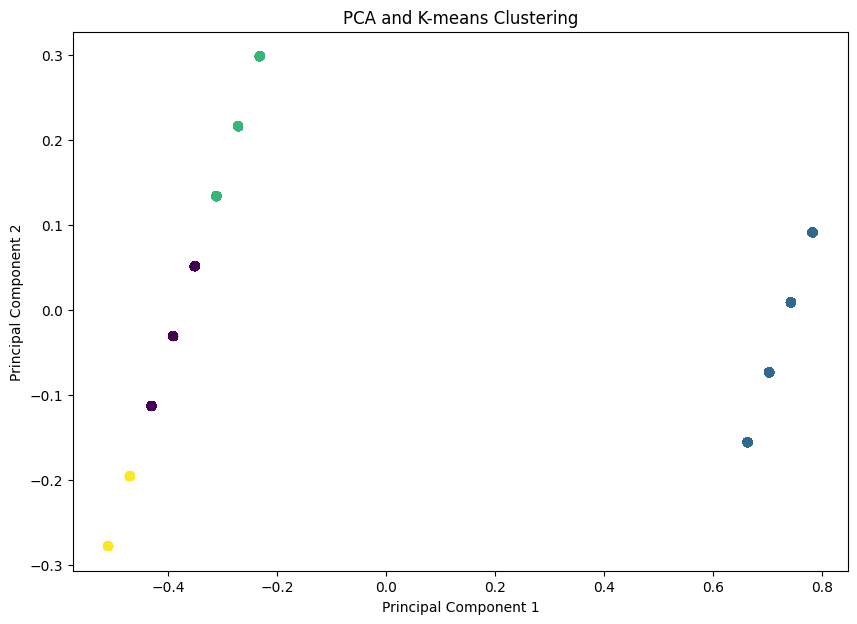

In [110]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# Assuming X_Train_scaled is already defined and scaled

# Initialize PCA with the number of components you want
pca = PCA(n_components=2)

# Fit and transform the scaled training data
X_Train_pca = pca.fit_transform(X_Train_scaled)

# Convert the PCA result to a DataFrame
X_Train_pca_df = pd.DataFrame(X_Train_pca, columns=['PC1', 'PC2'])

# Perform K-means clustering
kmeans = KMeans(n_clusters=4)  # Adjust the number of clusters as needed
kmeans.fit(X_Train_pca_df)

# Add the cluster labels to the DataFrame
X_Train_pca_df['Cluster'] = kmeans.labels_

# Plot the clusters
plt.figure(figsize=(10, 7))
plt.scatter(X_Train_pca_df['PC1'], X_Train_pca_df['PC2'], c=X_Train_pca_df['Cluster'], cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA and K-means Clustering')
plt.show()

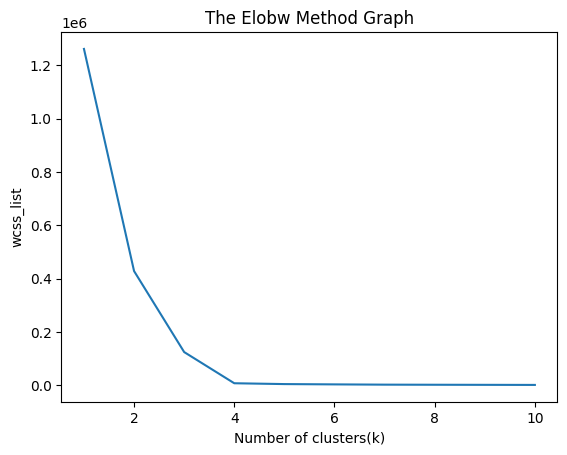

In [111]:
from sklearn.cluster import KMeans  
 
wcss_list= []  #Initializing the list for the values of WCSS  
 
#Using for loop for iterations from 1 to 10.  
 
for i in range(1, 11):  
 
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state= 42)  
 
    kmeans.fit(X_Train_pca_df)  
 
    wcss_list.append(kmeans.inertia_)  
 
plt.plot(range(1, 11), wcss_list)  
 
plt.title('The Elbow Method Graph')  
 
plt.xlabel('Number of clusters(k)')  
 
plt.ylabel('wcss_list')  
 
plt.show()

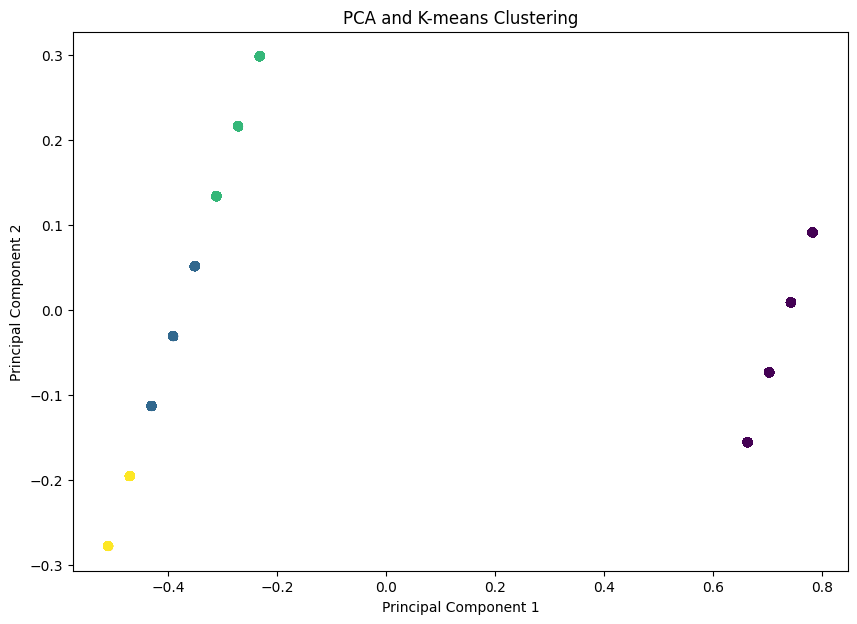

In [112]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# Assuming X_Train_scaled is already defined and scaled

# Initialize PCA with the number of components you want
pca = PCA(n_components=2)

# Fit and transform the scaled training data
X_Train_pca = pca.fit_transform(X_Train_scaled)

# Convert the PCA result to a DataFrame
X_Train_pca_df = pd.DataFrame(X_Train_pca, columns=['PC1', 'PC2'])

# Perform K-means clustering
kmeans = KMeans(n_clusters=4)  # Adjust the number of clusters as needed
kmeans.fit(X_Train_pca_df)

# Add the cluster labels to the DataFrame
X_Train_pca_df['Cluster'] = kmeans.labels_

# Plot the clusters
plt.figure(figsize=(10, 7))
plt.scatter(X_Train_pca_df['PC1'], X_Train_pca_df['PC2'], c=X_Train_pca_df['Cluster'], cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA and K-means Clustering')
plt.show()

In [113]:
combined_df = pd.concat([df, X_Train_pca_df], axis=1)

In [114]:
combined_df.head()

,MNTH_CODE,TRANS_DATE,START_DATE,SALES_VALUE,SALES_UNITS,SALES_VOLUME,SALES_PTR_VALUE,OC_CODE,DISTRIBUTOR_CODE,OUTLET_CODE,...,STATE,COUNTY,STREET,PRODUCT_CODE,CATEGORY,SUBCATEGORY,BRAND,PC1,PC2,Cluster
0,202312,2023-12-26,2023-11-27,372.73,2,0.000650,372.727273,202212,DB0110,OL112848,...,Illinois,City Center,Str2,PRD0118,Soap,Medicated Soap,Burgundy,0.783080,0.091040,0
1,202312,2023-12-26,2023-11-27,436.36,3,0.000900,436.363636,202212,DB0110,OL112848,...,Illinois,City Center,Str2,PRD0131,Soap,Toilet Soap,Grape vine,0.783080,0.091040,0
2,202312,2023-12-24,2023-11-27,202.82,2,0.000214,209.090909,202212,DB0209,OL112555,...,Tennessee,City Center,Str5,PRD0065,Hair Care,Hair Oil,Crimson,0.783080,0.091041,0
3,202312,2023-12-29,2023-11-27,142.86,16,0.000384,142.857143,202212,DB0655,OL113173,...,Washington,Orange,Str2,PRD0106,Hair Care,Shampoo,Hair & Shoulders,0.783080,0.091041,0
4,202312,2023-12-17,2023-11-27,145.45,1,0.000300,145.454545,202212,DB0652,OL112373,...,Connecticut,Dolphin,Str1,PRD0070,Perfume and Deodrants,Female Deodrant,Pista green,0.783079,0.091041,0


In [115]:
combined_df['Cluster'].value_counts()

Cluster
0    325646
2    261358
1    232129
3    147267
Name: count, dtype: int64

In [116]:
pip install snowflake-connector-python

You should consider upgrading via the 'pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [117]:
import pandas as pd
import snowflake.connector
from snowflake.connector.pandas_tools import write_pandas

In [118]:
combined_df['Cluster'].value_counts()


Cluster
0    325646
2    261358
1    232129
3    147267
Name: count, dtype: int64

In [119]:
combined_df['ClusterID'] = combined_df['Cluster']
 
di = {0: "CLUSTER_0", 1: "CLUSTER_1",2: "CLUSTER_2", 3: "CLUSTER_3"}
combined_df.replace({"ClusterID": di})

,MNTH_CODE,TRANS_DATE,START_DATE,SALES_VALUE,SALES_UNITS,SALES_VOLUME,SALES_PTR_VALUE,OC_CODE,DISTRIBUTOR_CODE,OUTLET_CODE,...,COUNTY,STREET,PRODUCT_CODE,CATEGORY,SUBCATEGORY,BRAND,PC1,PC2,Cluster,ClusterID
0,202312,2023-12-26,2023-11-27,372.73,2,0.000650,372.727273,202212,DB0110,OL112848,...,City Center,Str2,PRD0118,Soap,Medicated Soap,Burgundy,0.783080,0.091040,0,CLUSTER_0
1,202312,2023-12-26,2023-11-27,436.36,3,0.000900,436.363636,202212,DB0110,OL112848,...,City Center,Str2,PRD0131,Soap,Toilet Soap,Grape vine,0.783080,0.091040,0,CLUSTER_0
2,202312,2023-12-24,2023-11-27,202.82,2,0.000214,209.090909,202212,DB0209,OL112555,...,City Center,Str5,PRD0065,Hair Care,Hair Oil,Crimson,0.783080,0.091041,0,CLUSTER_0
3,202312,2023-12-29,2023-11-27,142.86,16,0.000384,142.857143,202212,DB0655,OL113173,...,Orange,Str2,PRD0106,Hair Care,Shampoo,Hair & Shoulders,0.783080,0.091041,0,CLUSTER_0
4,202312,2023-12-17,2023-11-27,145.45,1,0.000300,145.454545,202212,DB0652,OL112373,...,Dolphin,Str1,PRD0070,Perfume and Deodrants,Female Deodrant,Pista green,0.783079,0.091041,0,CLUSTER_0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
966395,202310,2023-10-29,2023-10-02,214.29,12,0.000624,214.285714,202210,DB0655,OL65099,...,Silver,Str2,PRD0014,Dental,ToothPaste,Toothy Sensitive,0.703551,-0.073705,0,CLUSTER_0
966396,202310,2023-10-28,2023-10-02,1527.27,12,0.003000,1527.272727,202210,DB0655,OL97239,...,City Center,Str5,PRD0107,Lotion,Body Lotion,Coral,0.703554,-0.073708,0,CLUSTER_0
966397,202310,2023-10-28,2023-10-02,285.71,36,0.000864,289.285714,202210,DB0209,OL160211,...,Santa Cruz,Str4,PRD0147,Kids Care,Baby Cream,Mint,0.703552,-0.073705,0,CLUSTER_0
966398,202310,2023-10-27,2023-10-02,209.09,2,0.000214,209.090909,202210,DB0655,OL113187,...,Scott,Str1,PRD0064,Hair Care,Conditioner,Bamboo,0.703551,-0.073705,0,CLUSTER_0


In [ ]:
#Code to write back dataframe to Snowflake
 
ins_train_sf=my_session.createDataFrame(
        combined_df.values.tolist(),
        schema=combined_df.columns.tolist())
ins_train_sf.write.mode("overwrite").save_as_table("ASSORTMENT_PLANNING.CPG_BRONZE.CLUSTERED_DATA")